In [1]:
pwd

'/home/mszmelcz/Documents/K2/generative_models/synesthesian_dreams/jupyter_notebooks'

In [2]:
cd ..

/home/mszmelcz/Documents/K2/generative_models/synesthesian_dreams


In [3]:
pwd

'/home/mszmelcz/Documents/K2/generative_models/synesthesian_dreams'

In [4]:
ls

configs/   experiments/        log.sh     __pycache__/  trainers/
data/      jupyter_notebooks/  models/    README.md     train.py
datasets/  logger/             networks/  run.sh        utils/


In [5]:
import numpy as np
import torch
from models.dcgan import DCGAN
import matplotlib.pyplot as plt
import torchvision.utils as vutils
from networks.dcgan_networks import Generator

In [6]:
model_path = "./experiments/dcgan_64_100_lr05/checkpoints/220.pt"

In [7]:
dcgan = DCGAN()
dcgan.load_netG_for_eval(model_path)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1            [-1, 512, 4, 4]         819,200
       BatchNorm2d-2            [-1, 512, 4, 4]           1,024
              ReLU-3            [-1, 512, 4, 4]               0
   ConvTranspose2d-4            [-1, 256, 8, 8]       2,097,152
       BatchNorm2d-5            [-1, 256, 8, 8]             512
              ReLU-6            [-1, 256, 8, 8]               0
   ConvTranspose2d-7          [-1, 128, 16, 16]         524,288
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
  ConvTranspose2d-10           [-1, 64, 32, 32]         131,072
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
  ConvTranspose2d-13            [-1, 3, 64, 64]           3,072
             Tanh-14            [-1, 3,

In [8]:
def generate_image(model):
        img = model.generate_images(1).squeeze()
        img = (img + 1) / 2
        print(img.min(), img.max(), img.mean())
        plt.imshow(np.transpose(img, (1,2,0)))

tensor(0.0182) tensor(0.9963) tensor(0.4647)


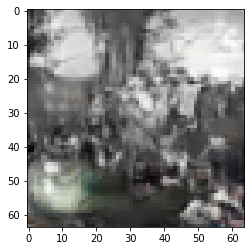

In [24]:
generate_image(dcgan)

In [10]:
def generate_and_plot(imgs, fig_size=(10,10)):
    _ = plt.figure(figsize=fig_size)
    plt.axis("off")
    plt.imshow(np.transpose(vutils.make_grid(imgs, nrow=int(np.sqrt(imgs.shape[0])), padding=5, normalize=True), (1,2,0)))

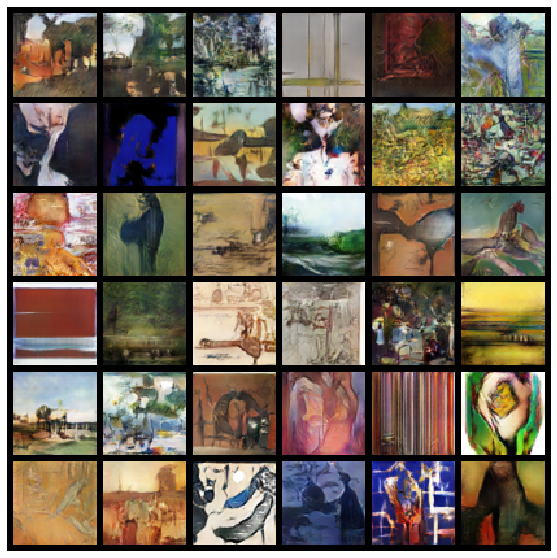

In [18]:
imgs = dcgan.generate_images(36)
generate_and_plot(imgs)